# About the Project
 The dataset under investigation is provided by the "Los Angeles Police Department" and is taken from data.lacity.org website. The dataset contains all the reported cases of crimes in the City of Los Angeles from 2010-2019. As 2019 is the most recent year with complete data, I have limited the analysis upto 2019.
 
__Source__ : https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z/about_data
 
 
## Purpose of Analysis
City of Los Angeles is popular being the center of entertainment industry, celebrities, lavish lifestyle and 2nd most populous city in the US. On the flipside, it is also known for high amount of crimes and unsafe neighbourhood for public and businesses. The analysis tries to identify the nature of crime and severity of crime in different areas of the city. The output of this analysis can aid business owners, people looking to move to LA or decision makers looking to mitigate crime in the city.

## Limitations of the Project
- The project only uses the crime dataset and population dataset of the city of Los Angeles. The scope does not include the analysis of other US states, reasons of crime or other factors that could have an impact on the crime rate in the city.
- Analysis/Recommendation is solely based on the dataset and personal observation from the dataset.
- The project stems from my interest to understand the crimes in my neighbourhood and also to practice my limited data analysis skill. This is not a professional analysis and will __include obvious or not so obvious mistakes.__
- Part of data is removed from analysis where age of vicitim is 0 or less. The dataset might consider these instances as victims who are of unknown origin.

In [1]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Some interesting highlights found:

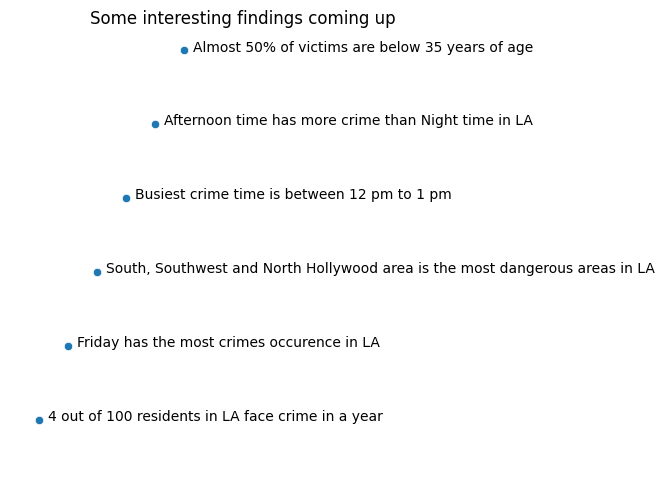

In [2]:
my_list={"position":[1,2,3,4,5,6],
         "text":["4 out of 100 residents in LA face crime in a year",
        "Friday has the most crimes occurence in LA",
        "South, Southwest and North Hollywood area is the most dangerous areas in LA",
        "Busiest crime time is between 12 pm to 1 pm",
        "Afternoon time has more crime than Night time in LA",
        "Almost 50% of victims are below 35 years of age"]
         }
list_viz=pd.DataFrame(my_list)
list_viz

plt.figure(figsize=(6,6))

sns.scatterplot(data=list_viz,x="position", y="position")
    
plt.xlim(0,16)
plt.xticks(ticks=[0])
plt.yticks(ticks=[0])
plt.xlabel("")
plt.ylabel("")
plt.axis('off')
plt.title("Some interesting findings coming up")

for i,(position,value) in enumerate(zip(list_viz['position'],list_viz['text'])):
    plt.text(i+1.3,position-0.05,value,ha='left',va='bottom')

plt.show()

In [3]:
# Importing dataset
crime = pd.read_csv(('/kaggle/input/crime-la/Crime_Data_from_2010_to_2019.csv'))
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [4]:
population_LA = pd.read_csv("/kaggle/input/crime-la/population_LA.csv")
population_LA.columns=(['year','population'])
population_LA=population_LA[(population_LA['year']>=2010)&(population_LA['year']<=2019)]
population_LA

,year,population
2,2019,3982885
3,2018,3981140
4,2017,3975067
5,2016,3957520
6,2015,3933644
7,2014,3904102
8,2013,3877721
9,2012,3847857
10,2011,3818812
11,2010,3795206


# Preliminary data set analysis

In [5]:
# Observing the dataset
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135775 entries, 0 to 2135774
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

In [6]:
crime.shape

(2135775, 28)

In [7]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

## Data Cleaning

__*Data and columns need some cleaning: whitespaces in column names, unwanted columns,data types.. need to work on those*__

In [8]:
# Removing whitespace in columns
crime.rename(columns=lambda x:x.strip(), inplace=True)

# Dropping unwanted columns
crime=crime.drop(columns=['AREA','Rpt Dist No','Part 1-2','Crm Cd','Status','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','Mocodes','Premis Cd','Weapon Used Cd','LAT','LON','Cross Street'])

# Bringing some uniformity in the column names for readability
crime.columns = crime.columns.str.lower().str.replace(' ','_')
crime.head()

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,Newton,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,NaN,Adult Arrest,300 E GAGE AV
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,NaN,Invest Cont,SEPULVEDA BL
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,Newton,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,NaN,Invest Cont,1300 E 21ST ST
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,Hollywood,VIOLATION OF COURT ORDER,47,F,W,STREET,HAND GUN,Invest Cont,CAHUENGA BL
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,Central,"RAPE, ATTEMPTED",47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST


In [9]:
# Updating date fields into correct data types
crime['date_rptd']=pd.to_datetime(crime['date_rptd'])
crime['date_occ']=pd.to_datetime(crime['date_occ'])

/tmp/ipykernel_18/2062175785.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime['date_rptd']=pd.to_datetime(crime['date_rptd'])
/tmp/ipykernel_18/2062175785.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime['date_occ']=pd.to_datetime(crime['date_occ'])


In [10]:
#Filling "vict_descent" column with data instead of code (Extracted from source)
crime['vict_descent'] = crime['vict_descent'].replace({'A':'Other Asian',
                                                           'B':'Black',
                                                           'C':'Chinese',
                                                           'D':'Cambodian',
                                                           'F':'Filipino', 
                                                           'G':'Guamanian',
                                                           'H':'Hispanic/Latin/Mexican',
                                                           'I':'American Indian/Alaskan Native', 
                                                           'J':'Japanese',
                                                           'K':'Korean',
                                                           'L':'Laotian',
                                                           'O':'Other',
                                                           'P':'Pacific Islander',
                                                           'S':'Samoan',
                                                           'U':'Hawaiian',
                                                           'V':'Vietnamese',
                                                           'W':'White',
                                                           'X':'Unknown',
                                                           'Z':'Asian Indian'})

___Lets see if we need to treat some missing values___

In [11]:
# Checking any missing data
crime.isna().mean()*100

dr_no            0.000000
date_rptd        0.000000
date_occ         0.000000
time_occ         0.000000
area_name        0.000000
crm_cd_desc      0.000000
vict_age         0.000000
vict_sex         9.444253
vict_descent     9.446360
premis_desc      0.009083
weapon_desc     66.437148
status_desc      0.000000
location         0.000000
dtype: float64

In [12]:
# Filling missing values with some logical values that does not hamper our analysis
crime.fillna({'vict_sex':'Unknown',
             'vict_descent':'Unknown',
             'weapon_desc':'UNKNOWN WEAPON/OTHER WEAPON'},inplace=True)

___Let's check the validity of data___

In [13]:
print(crime['vict_age'].min())
print(crime['vict_age'].max())

-12
118


In [14]:
# Proportion of data with negative or zero age seems high.. 
# still I opted to remove these data points to make analysis uniform(Limiation 4)
((crime['vict_age']<0)|(crime['vict_age']==0)).sum()/crime.shape[0]

0.17682574241200502

In [15]:
# removing negative age of victim and ages with 0 for analysis purpose
crime=crime[~((crime['vict_age']<0)|(crime['vict_age']==0))]
crime.head()

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location
0,1307355,2010-02-20,2010-02-20,1350,Newton,VIOLATION OF COURT ORDER,48,M,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,UNKNOWN WEAPON/OTHER WEAPON,Adult Arrest,300 E GAGE AV
3,90631215,2010-01-05,2010-01-05,150,Hollywood,VIOLATION OF COURT ORDER,47,F,White,STREET,HAND GUN,Invest Cont,CAHUENGA BL
4,100100501,2010-01-03,2010-01-02,2100,Central,"RAPE, ATTEMPTED",47,F,Hispanic/Latin/Mexican,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST
5,100100506,2010-01-05,2010-01-04,1650,Central,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,Black,DEPARTMENT STORE,UNKNOWN WEAPON/OTHER WEAPON,Adult Arrest,700 W 7TH ST
6,100100508,2010-01-08,2010-01-07,2005,Central,BURGLARY FROM VEHICLE,46,M,Hispanic/Latin/Mexican,STREET,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,PICO BL


In [16]:
# Removing a record with 118 year of age and removing records after 2019
crime=crime[~(crime['vict_age']>110)]
crime=crime[crime['date_occ']<'2020']

In [17]:
crime.isna().mean()*100

dr_no           0.000000
date_rptd       0.000000
date_occ        0.000000
time_occ        0.000000
area_name       0.000000
crm_cd_desc     0.000000
vict_age        0.000000
vict_sex        0.000000
vict_descent    0.000000
premis_desc     0.005199
weapon_desc     0.000000
status_desc     0.000000
location        0.000000
dtype: float64

___Now the dataset looks clean enough for analysis___<br>
__Let's create some categories to analyze data__

In [18]:
# Creating age bins for analysis
label =['<18','18-25','26-35','36-45','46-55','56-65','65+']
criteria=[0,17,25,35,45,55,65,np.inf]

crime['vict_age_group']= pd.cut(crime['vict_age'],bins=criteria,labels=label)

In [19]:
# Extracting year, month and day of crime from date_occ column
crime['year_occ']=crime['date_occ'].dt.year
crime['month_occ']=crime['date_occ'].dt.month_name()
crime['day_occ']=crime['date_occ'].dt.day_name()

In [20]:
crime.shape

(1711777, 17)

__1 million rows and 17 columns to analyze... Here we go__

# DATA ANALYSIS

# Questions we are trying to answer
- How is the trend of crime changing in LA?
- What is the most dangerous area in LA?
- Who are the victims of crime in LA?
- What is the most dangerous time/month in LA?
- What kind of crime is most frequent in LA?
- Who are being targeted M/F in LA?
- What age groups are the victims from?
- What weapons are used in crimes?

- Percentage of crime and population
- Analysis of Violent and Property Crime.


## Trend of Crime

_**Calculating crime rate in LA**_

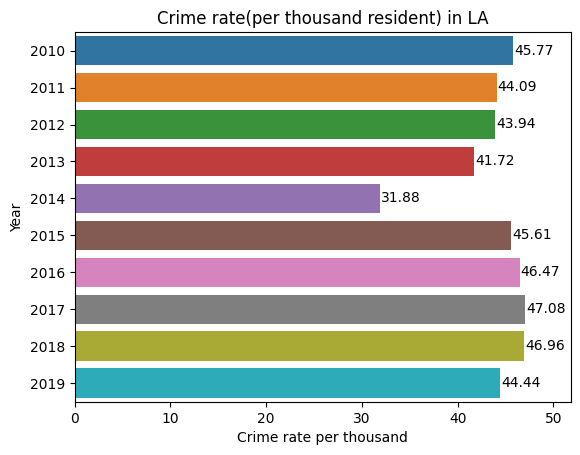

In [21]:
crime_year = crime.groupby("year_occ").size().reset_index(name='count').sort_values("year_occ",ascending=False)
crime_year

crime_rate = crime_year.merge(population_LA,left_on="year_occ",right_on="year",how="inner").drop("year",axis=1)
#Calculating the crime proportion of population
crime_rate['prop_per_thou']=round(crime_rate['count']/(crime_rate["population"]/1000),2)
crime_rate['crime_percentage']=round(crime_rate['count']/crime_rate["population"]*100,2)
crime_rate

sns.barplot(data=crime_rate, x='prop_per_thou',y='year_occ',orient="h")
plt.title("Crime rate(per thousand resident) in LA")
plt.xlabel("Crime rate per thousand")
plt.ylabel("Year")
plt.xlim(0,max(crime_rate['prop_per_thou'])*1.1)

for year,rate in enumerate(crime_rate['prop_per_thou'][::-1]):
     plt.text(rate+0.1,year+0.1,rate)
plt.show()

In [22]:
# Grouping data by year, month and day to get the number of crimes respectively
grouped_year = crime.groupby('year_occ').size().reset_index().rename(columns={'year_occ':'year',0:'count'})
grouped_month = crime.groupby('month_occ').size().reset_index().rename(columns={'month_occ':'month',0:'count'})
grouped_day = crime.groupby('day_occ').size().reset_index().rename(columns={'day_occ':'day',0:'count'})

___Calculating trend of total crimes reported during 2010-2019___

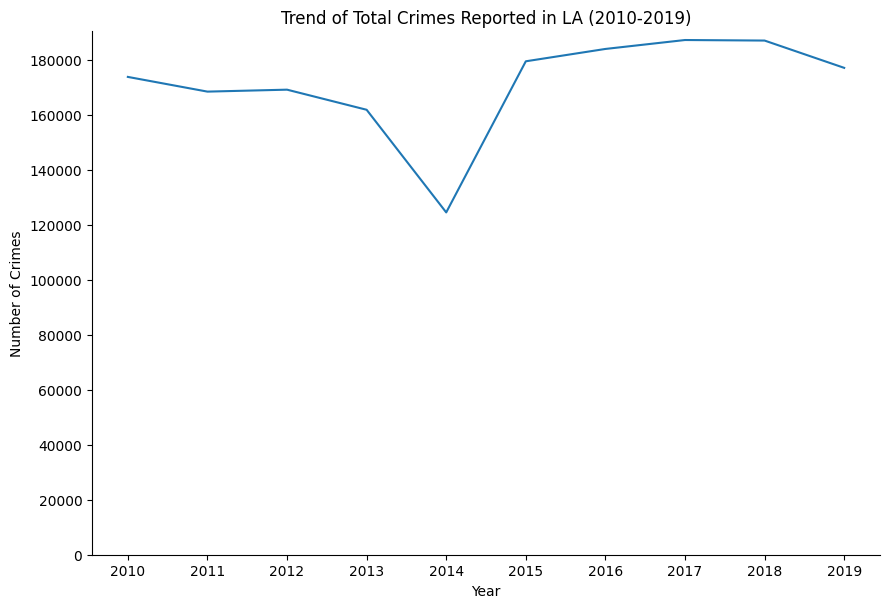

In [23]:
# Visualizing the trend of crime

sns.relplot(x='year',y='count',height=6,aspect=1.5,data=grouped_year,kind='line')
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Trend of Total Crimes Reported in LA (2010-2019)")
plt.xticks(grouped_year['year'])
plt.yticks(np.arange(0,grouped_year['count'].max(),20000))
plt.show()

___Calculating trend crimes reported by month during 2010-2019___

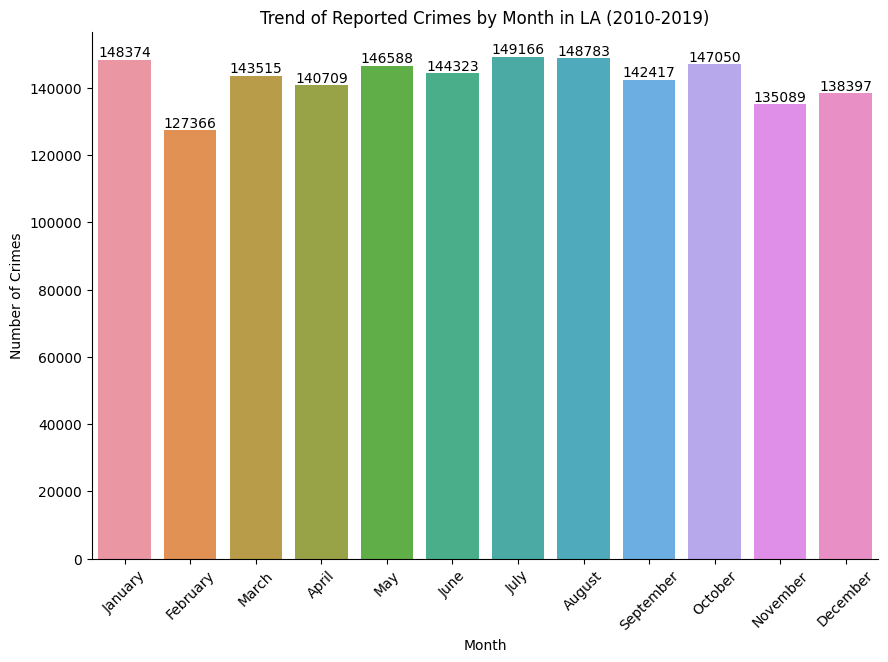

In [24]:
order_month=['January','February','March','April','May','June','July','August','September','October','November','December']
ordered_count=grouped_month.set_index('month').loc[order_month].reset_index()


sns.catplot(x='month',y='count',height=6,aspect=1.5,kind='bar',data=grouped_month,order=order_month)
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.title("Trend of Reported Crimes by Month in LA (2010-2019)")
plt.xticks(rotation=45)

for i, (value) in enumerate(ordered_count['count']):
    plt.text(i, value, value,ha='center',va='bottom')

plt.show()

___Calculating trend of crimes reported by day of week___

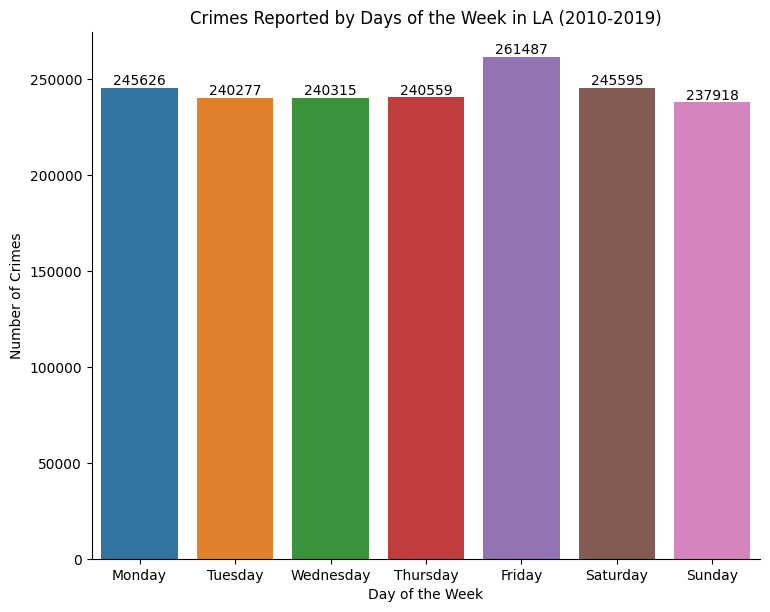

In [25]:
day_order =["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
ordered_day = grouped_day.set_index('day').loc[day_order].reset_index()

sns.catplot(x="day",y="count",height=6,aspect=1.3,data=ordered_day, kind='bar')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Crimes")
plt.title("Crimes Reported by Days of the Week in LA (2010-2019)")

for i, value in enumerate(ordered_day['count']):
    plt.text(i,value,value, ha="center",va="bottom")
plt.show()

___Heatmap showing crime trend throughout 2010-2019___

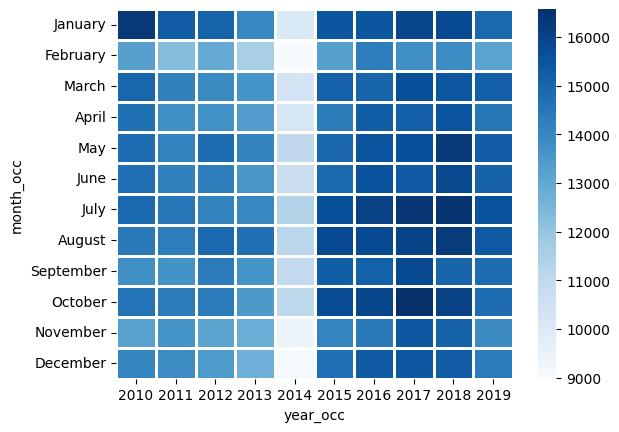

In [26]:
#Heat map of trend
full_month_names = [
    'January', 'February', 'March', 'April',
    'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'
]

grouped_main = crime.groupby(['year_occ','month_occ']).size().reset_index(name='count')
pivoted_main = grouped_main.pivot_table(index='month_occ',columns='year_occ',values='count')
pivoted_main=pivoted_main.loc[full_month_names]
pivoted_main

sns.heatmap(pivoted_main,cmap='Blues',linecolor='white',linewidth=1)
plt.yticks(rotation=0)
plt.show()

### Insight:
#### - Crime seems to be on the rise each year in LA except for the year 2014 where it took a dip and in a decreasing trend from 2018.
#### - Jan, July, August seem to be months with highest crimes reported whereas there are fewer reported crimes during February
#### - Friday is the most dangerous day of the week with the most crimes reported and Sunday has the least crimes reported.

## Most frequent types of crime in LA city

___Now let's find the 10 most frequent types of crime in LA___

In [27]:
top_10_crime = crime['crm_cd_desc'].value_counts().head(10).index.to_list()
top_10_crime

['BATTERY - SIMPLE ASSAULT',
 'BURGLARY FROM VEHICLE',
 'THEFT PLAIN - PETTY ($950 & UNDER)',
 'BURGLARY',
 'THEFT OF IDENTITY',
 'INTIMATE PARTNER - SIMPLE ASSAULT',
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
 'ROBBERY']

In [28]:
#Filtering the top 10 crime data
top_crime_type = crime[crime['crm_cd_desc'].isin(top_10_crime)]

In [29]:
#Finding the number of crimes reported for each type
grouped_pie = top_crime_type.groupby('crm_cd_desc').size().reset_index(name='count')
grouped_pie.sort_values('count',ascending=False)

,crm_cd_desc,count
1,BATTERY - SIMPLE ASSAULT,184882
3,BURGLARY FROM VEHICLE,156760
7,THEFT PLAIN - PETTY ($950 & UNDER),128416
2,BURGLARY,124447
6,THEFT OF IDENTITY,123194
4,INTIMATE PARTNER - SIMPLE ASSAULT,110903
8,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",90243
0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",88469
9,VANDALISM - MISDEAMEANOR ($399 OR UNDER),78105
5,ROBBERY,73091


___Donut chart showing the proportion of each type of crime in the top 10 crimes___

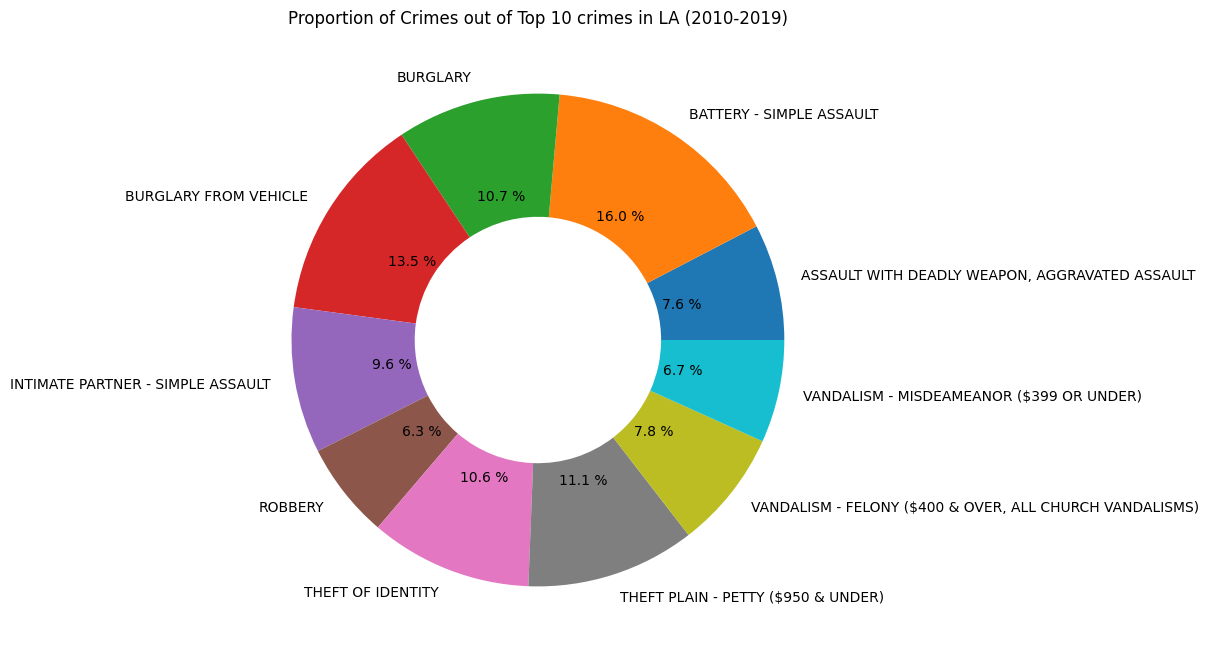

In [30]:
plt.figure(figsize=(8,8))

plt.pie(x=grouped_pie['count'],labels=grouped_pie['crm_cd_desc'],
       wedgeprops={'linewidth':1,'width':0.5},
       autopct = '%.1f %%',
        textprops = {'fontsize':10})
plt.title("Proportion of Crimes out of Top 10 crimes in LA (2010-2019)")
plt.show()

In [31]:
#Pivoting the data to create a stacked bar chart
grouped_top = top_crime_type.groupby(['year_occ','crm_cd_desc']).size().reset_index(name='count')
pivoted_top = grouped_top.pivot_table(index='year_occ',columns='crm_cd_desc',values='count')
pivoted_top

crm_cd_desc,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",BATTERY - SIMPLE ASSAULT,BURGLARY,BURGLARY FROM VEHICLE,INTIMATE PARTNER - SIMPLE ASSAULT,ROBBERY,THEFT OF IDENTITY,THEFT PLAIN - PETTY ($950 & UNDER),"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER)
year_occ,,,,,,,,,,
2010,8157,20354,14513,17466,10358,8789,13111,9332,8558,8965
2011,7717,19760,14391,15651,10039,8158,13336,12668,7466,9312
2012,7350,19650,13595,15666,10258,7198,14238,13841,7707,8889
2013,6852,18742,13018,15206,9817,6267,13350,13950,7663,8115
2014,6315,14389,9400,10393,8486,4792,7994,11055,6539,6324
2015,9956,17438,12869,14205,12677,7048,14954,13997,9937,7478
2016,10520,17755,12190,16437,12355,7912,13349,13170,10767,7709
2017,10657,18898,12364,17710,12534,8191,12511,13045,10678,7625
2018,10461,19184,12089,17722,12368,7666,10866,13771,10590,7305


___Stacked bar chart showing the trend of each 10 crime types in the past 10 years___

<Figure size 1000x1200 with 0 Axes>

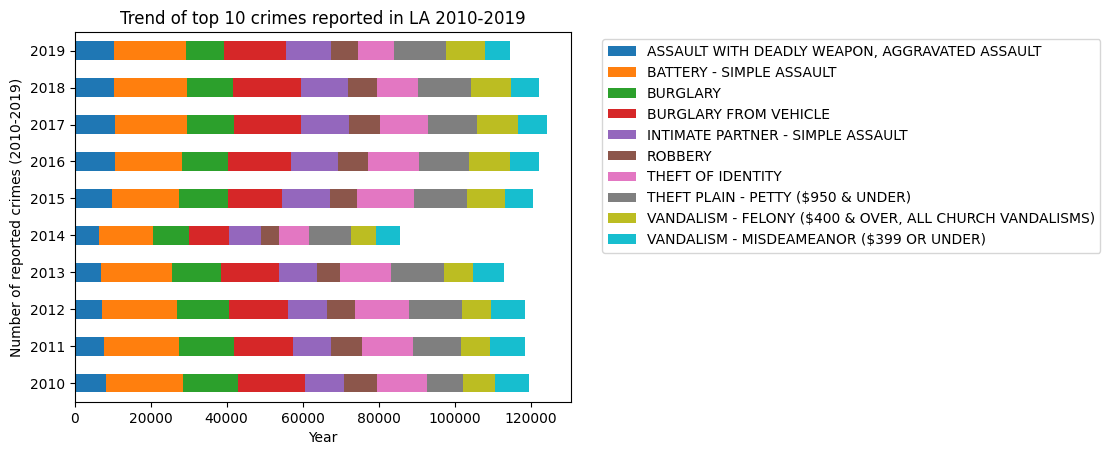

In [32]:
plt.figure(figsize=(10,12))

pivoted_top.plot(kind='barh',stacked=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Year")
plt.ylabel("Number of reported crimes (2010-2019)")
plt.title("Trend of top 10 crimes reported in LA 2010-2019")
plt.show()

### Insight:
#### - BATTERY - SIMPLE ASSAULT (184882), BURGLARY FROM VEHICLE (156760), THEFT PLAIN - PETTY ($950 & UNDER)	(128416) are the top 3 types of crimes
#### - Petty theft, aggravated assault and Intimate Partner Assault seem to be on a rising trend
#### - Identity theft is on a slowing trend in LA city
    

## Most Dangerous Areas in LA City

__You can click on the link below to follow the 21 different areas as per LAPD__<br>
https://geohub.lacity.org/datasets/031d488e158144d0b3aecaa9c888b7b3/explore

In [33]:
# Number of crimes in each LA city areas (21 areas distributed based on LA Patrol Division)
crime['area_name'].value_counts()

area_name
77th Street    123700
Southwest      119561
N Hollywood     92112
Pacific         89465
Central         86671
Southeast       85200
Van Nuys        83134
Topanga         80620
Hollywood       80254
Northeast       79017
Devonshire      77313
West LA         76950
Newton          76125
Rampart         76076
Mission         75975
Wilshire        75494
West Valley     72528
Harbor          70620
Olympic         68819
Foothill        64849
Hollenbeck      57294
Name: count, dtype: int64

In [34]:
# Calculating the top 3 types of crimes in each area
crime_area = crime.groupby(['area_name','crm_cd_desc']).size().reset_index(name='count')
crime_top_area = crime_area.groupby('area_name').apply(lambda x:x.nlargest(3,'count')).reset_index(drop=True)
crime_top_area

,area_name,crm_cd_desc,count
0,77th Street,BATTERY - SIMPLE ASSAULT,14930
1,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",11425
2,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,9789
3,Central,BATTERY - SIMPLE ASSAULT,14523
4,Central,THEFT PLAIN - PETTY ($950 & UNDER),10195
...,...,...,...
58,West Valley,BURGLARY,7146
59,West Valley,BURGLARY FROM VEHICLE,7041
60,Wilshire,BURGLARY FROM VEHICLE,8248
61,Wilshire,BURGLARY,7557


___Visualizing the areas and 3 most common crimes in each area___<br>

In [35]:
fig = px.sunburst(crime_top_area, path=['area_name','crm_cd_desc'], values='count',width=800, height=800)
fig.show()

### Insights:
#### - 77th street(South LA), Southwest (USC), Central(Downtown LA), N Hollywood, Pacific(LA Airport, Beach) and Hollywood are the most dangerous areas in LA city
#### - Battery(Simple Assault), Petty Theft and Burglary seem to be the most frequent type of crimes in most areas
#### - Identity Theft is also a recurring crime in areas like North hollywood, West LA, Devonshire, Van Nuys, Northeast, West Valley
#### - Some area like 77th street, Southeast, Rampart, Olympic, Harbor, Foothill and Hollenback have intimate partner assault frequently<br>

- Thing to note Santa Monica, Beverly Hills has its own police department and LAPD does not have its HQ in these areas
- Popular area like Central (Downtown LA), Pacific (LA airport, Beach), Wilshire and Hollywood area have same types of crimes in common (Burglary, simple assault and petty theft).

## Victim Analysis

__Who are the victims in LA Crimes?__

_**Victims by ethnicity**_

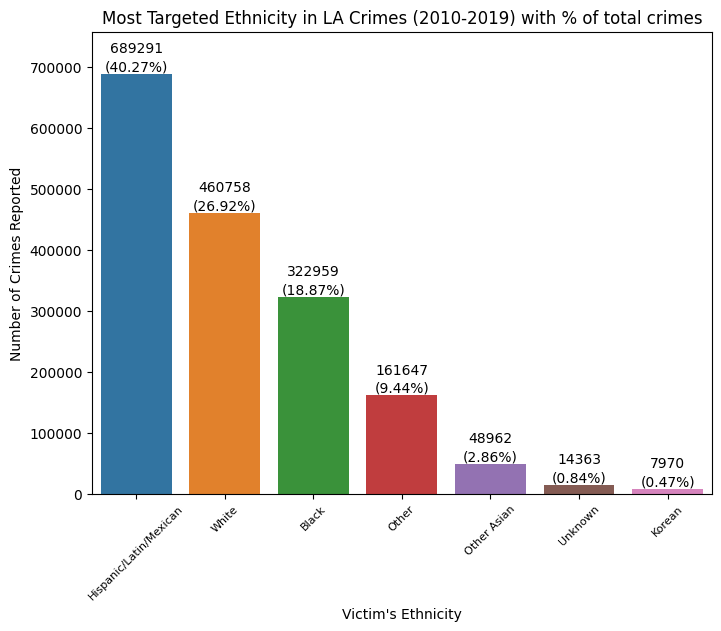

In [36]:
#Calculating the percentage of each ethnicity and filtering the top 7 ethnicity of the victims 
descent = crime.groupby('vict_descent').size().reset_index(name='count')
descent['percent'] = descent['count'].apply(lambda x:x/(descent['count'].sum())*100)
descent['percent']=round(descent['percent'],2)
descent = descent.sort_values('count',ascending=False).nlargest(7,'count')

#Plotting the graph
plt.figure(figsize=(8,6))
sns.barplot(data=descent,x='vict_descent',y='count')
plt.xticks(rotation=45,fontsize=8)
plt.xlabel("Victim's Ethnicity")
plt.ylabel("Number of Crimes Reported")
plt.title("Most Targeted Ethnicity in LA Crimes (2010-2019) with % of total crimes")
plt.ylim(0,descent['count'].max()*1.1)

for i,(value,perc) in enumerate(zip(descent['count'],descent['percent'])):
    plt.text(i, value+30000, value, ha='center',va='bottom')
    plt.text(i, value, "("+str(perc)+"%)", ha='center',va='bottom')
plt.show()

_**Victims by gender**_

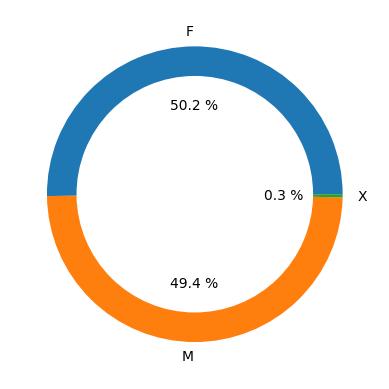

In [37]:
#Filtering the data with gender information filled out
crime_sex = crime[(crime['vict_sex'].isin(["M","F","X"]))&~(crime['vict_descent']=="-")]

crime_sex_group = crime_sex['vict_sex'].value_counts().reset_index(name='count')
crime_sex_group.columns=['gender','count']

# Plotting in a pie chart
plt.pie(x=crime_sex_group['count'],labels=crime_sex_group['gender'],autopct='%.1f %%',wedgeprops=dict(width=0.2))
plt.show()

_**Ethnicity and Gender Relation with number of Crimes**_

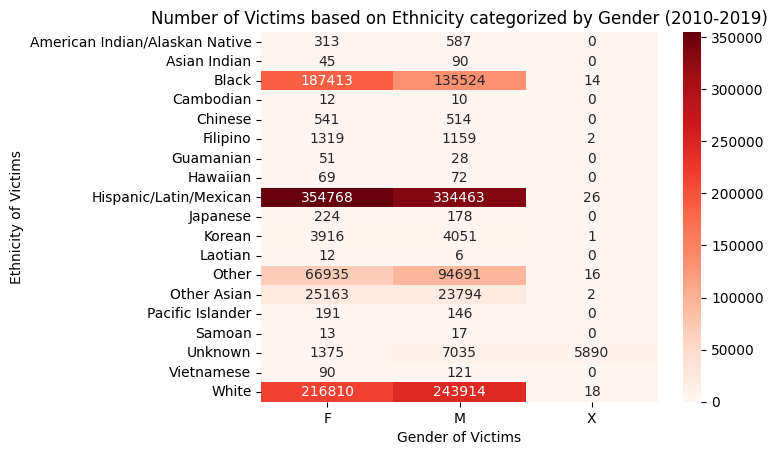

In [38]:
#Creating Heatmap showing number of victims based on gender and their ethnicity 
sex_descent_grouped = crime_sex.groupby(["vict_sex","vict_descent"]).size().reset_index(name='count').sort_values(['vict_sex','count'],ascending=[True,False])

pivoted_sex_descent=sex_descent_grouped.pivot_table(index='vict_descent',columns='vict_sex',values='count',fill_value=0)
sns.heatmap(pivoted_sex_descent,cmap='Reds',annot=True,fmt="d")
plt.title("Number of Victims based on Ethnicity categorized by Gender (2010-2019)")
plt.xlabel("Gender of Victims")
plt.ylabel("Ethnicity of Victims")
plt.show()

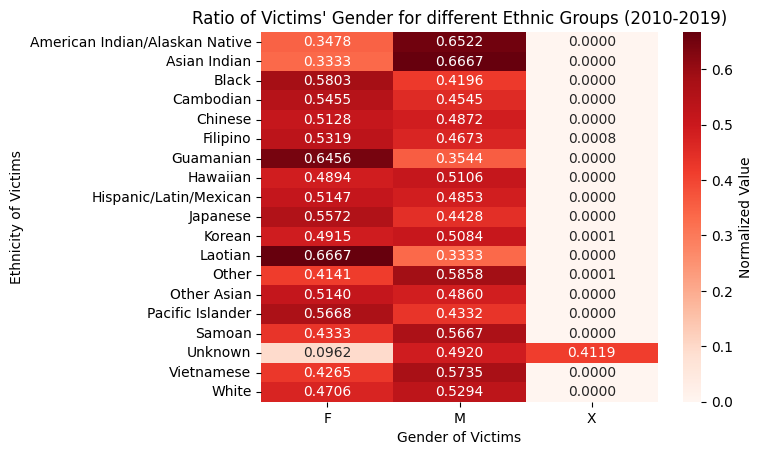

In [39]:
#Visualizing the breakdown of victims' Ethnicity by Gender (using Normalized heatmap)

normalized_data = pivoted_sex_descent.div(pivoted_sex_descent.sum(axis=1),axis=0)

sns.heatmap(normalized_data, cmap='Reds', annot=True, fmt=".4f", cbar_kws={'label': 'Normalized Value'})
plt.title("Ratio of Victims' Gender for different Ethnic Groups (2010-2019)")
plt.xlabel("Gender of Victims")
plt.ylabel("Ethnicity of Victims")
plt.show()

### Insights:
#### - Hispanic/Latin/Mexicans are the most victimized group followed by people with White and Black descent
#### - Male and female do not have significant difference in the number of crimes against them
#### - American Indian/Alaskan Native and Asian Indian have high number of males who are victim of crime
#### - Laotian, Guamanian, Black, Japanese, Pacific Islanders female population are more victimized than their male counterpart

__Ethnicity victims related to their population distribution__ Yet to be done

# Crime Time Analysis

_**Time of day and crime relationship**_


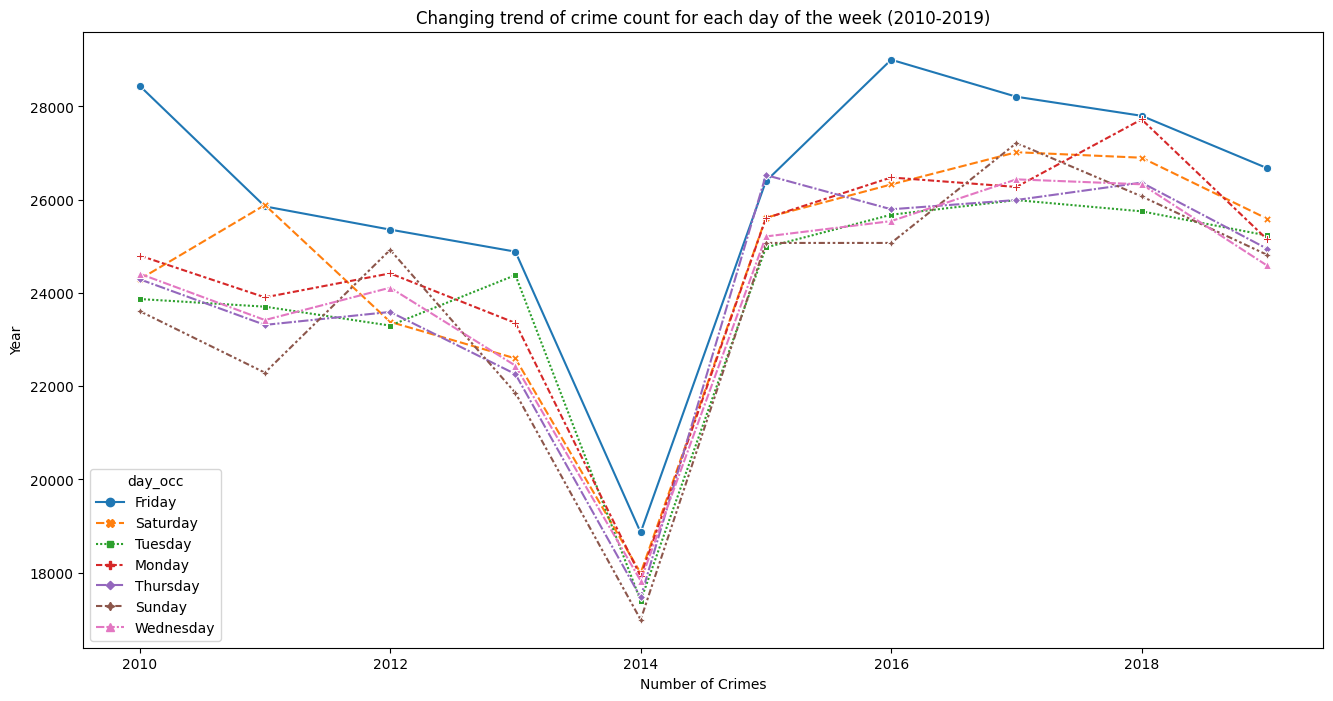

In [40]:
# Changing trend of daywise crime
# Filtering data to see year and Day wise crime count
crime_year_day = crime[['year_occ','day_occ']].value_counts().reset_index(name='count')
crime_year_day.sort_values(['year_occ','count'],ascending=[False,False],inplace=True)

plt.figure(figsize=(16,8))

sns.lineplot(data=crime_year_day, x='year_occ',y='count',hue='day_occ',style='day_occ',markers=True)
plt.title("Changing trend of crime count for each day of the week (2010-2019)")
plt.xlabel("Number of Crimes")
plt.ylabel("Year")

plt.show()

_**What time of day is the most dangerous in LA?**_

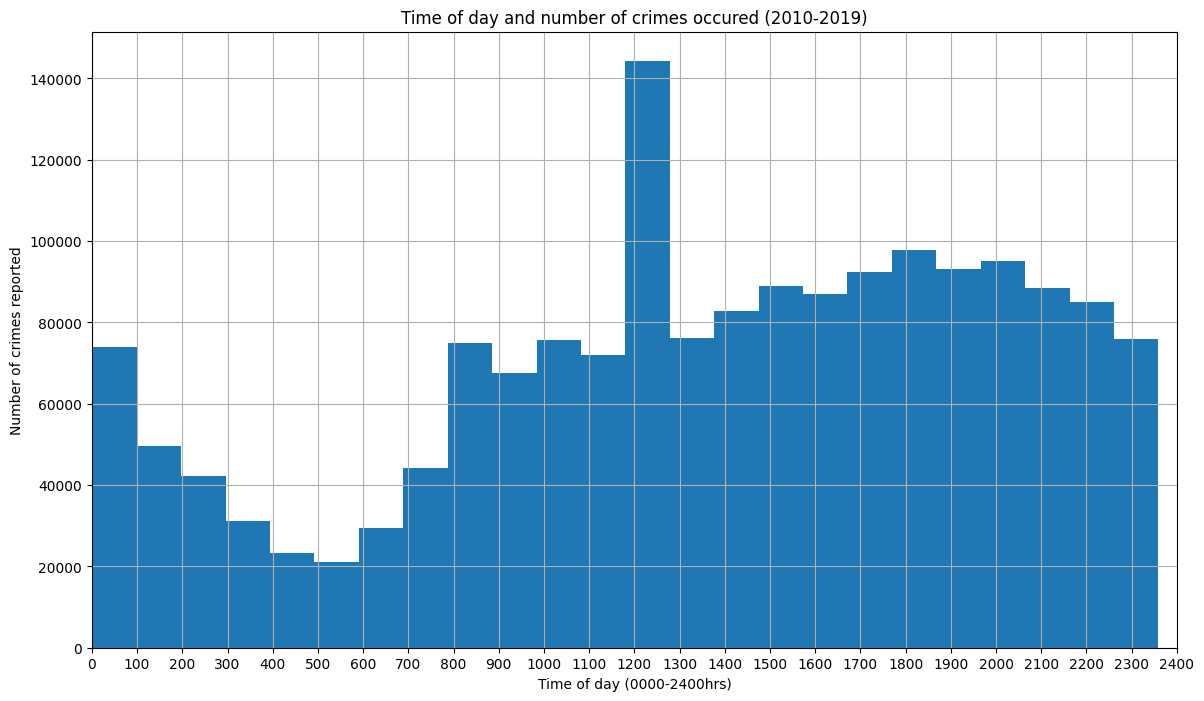

In [41]:
# Plotting a histogram of number of crimes and time of day
plt.figure(figsize=(14,8))

crime['time_occ'].hist(bins=24)
plt.title("Time of day and number of crimes occured (2010-2019)")
plt.xlabel("Time of day (0000-2400hrs)")
plt.ylabel("Number of crimes reported")
plt.xlim(0,2400)
plt.xticks(np.arange(0,2500,100))
plt.show()

_**Finding the most dangerous area in night time**_

In [42]:
#Creating categories for time of day data
my_list=[]
for value in crime['time_occ']:
    if (value >= 2100) | (value < 500):
        my_list.append("Night")
    elif (value >= 500) & (value < 1200):
        my_list.append("Morning")
    elif (value >=1200) & (value< 1700):
        my_list.append("Afternoon")
    else:
        my_list.append("Evening")
        
crime['tod']=my_list

_**Time of day and gender analysis**_

In [43]:
# Grouping gender and time of day to analyze time of day and impact on gender roles
sex_tod_grouped=crime.groupby(['vict_sex','tod']).size().reset_index(name='count')
sex_tod_grouped.sort_values(['vict_sex','count'],ascending=[True,False],inplace=True)
sex_tod_grouped

,vict_sex,tod,count
0,-,Afternoon,1
1,F,Afternoon,245512
4,F,Night,225701
3,F,Morning,202068
2,F,Evening,185979
8,H,Night,18
6,H,Evening,17
7,H,Morning,17
5,H,Afternoon,16
12,M,Night,242215


In [44]:
# Creating a Sunburst
fig=px.sunburst(sex_tod_grouped,path=['tod','vict_sex'],values='count',title="Time of day and number of crimes reported (2010-2019)")
fig.update_traces(textinfo='label+value')

fig.show()

_**Most Crime Prone Area in different time of day**_

In [45]:
# Finding the most crime prone area according to the time of day

crime_tod_area = crime.groupby(['tod', 'area_name']).size().reset_index(name='count')

highest_crime_time =  crime.groupby(['tod', 'area_name']).size().groupby('tod').idxmax().reset_index(name='multi_index')
highest_crime_time[['tod','area_name']]=highest_crime_time['multi_index'].apply(pd.Series)
highest_crime_time.drop(columns='multi_index',inplace=True)
highest_crime_time

,tod,area_name
0,Afternoon,Southwest
1,Evening,Southwest
2,Morning,77th Street
3,Night,77th Street


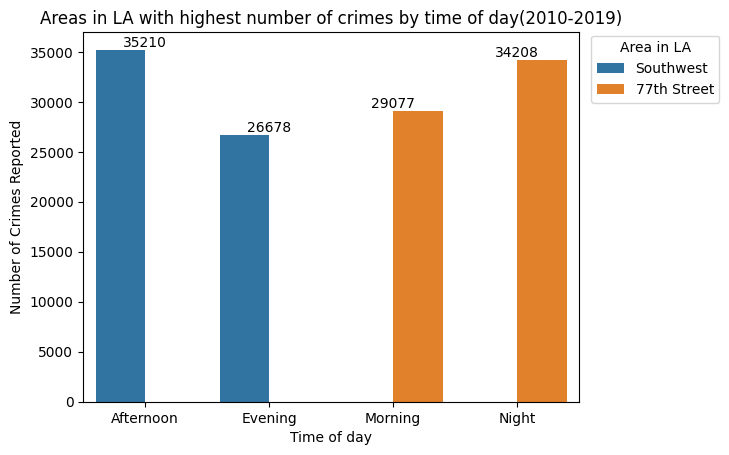

In [46]:
# Plotting the most crime prone areas in each time of day category
highest_tod_area = pd.merge(highest_crime_time, crime_tod_area[['tod','area_name','count']],on=['tod','area_name'],how='left')
highest_tod_area

sns.barplot(x='tod',y='count',data=highest_tod_area,hue='area_name')
plt.xlabel("Time of day")
plt.ylabel("Number of Crimes Reported")
plt.legend(bbox_to_anchor=(1.01,0.90),loc="center left").set_title("Area in LA")
plt.title("Areas in LA with highest number of crimes by time of day(2010-2019)")

for i, value in enumerate(highest_tod_area['count']):
    plt.text(i,value,value,ha="center",va="bottom")

plt.show()

### Insights:
#### - Friday seems to be the most crime prone day of the week
#### - Most crime occur during 12:00 pm to 1:00 pm, so be careful during these time of day in LA
#### - Most crimes are reported in the afternoon time and night time
#### - Females face the most crimes during Afternoon and Morning whereas Males face most crime during Evening and Night
#### - Most crime reports come from Soutwest area during Afternoon and Evening and 77th street is most dangerous during morning and night times

## Victim's Age

_**Relation of age of the victims and crimes they face in LA**_

**Yearly breakdown of age-group and crimes they face**

In [47]:
# Grouping data by victims' age group and year and plotting in a treemap
year_age_grp = crime.groupby(['year_occ','vict_age_group']).size().reset_index(name='count')
fig=px.treemap(year_age_grp,path=['year_occ','vict_age_group'],values='count',title='Treemap of crimes reported by different age groups(2010-2019)')
fig.update_traces(textinfo='label+value')
fig.show()

**Which age groups are vulnerable to most crimes in LA**

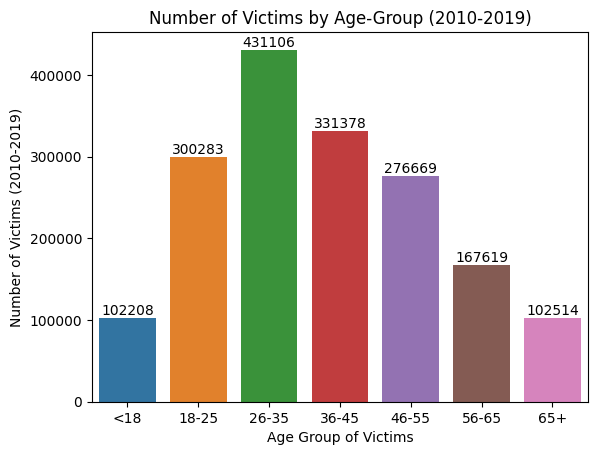

In [48]:
# Bar chart for victims' age group
crime_age = crime.groupby('vict_age_group').size().reset_index(name='count')
sns.barplot(data=crime_age,x='vict_age_group',y='count')
plt.xlabel("Age Group of Victims")
plt.ylabel("Number of Victims (2010-2019)")
plt.title("Number of Victims by Age-Group (2010-2019)")

for i,value in enumerate(crime_age['count']):
    plt.text(i,value,value, va='bottom',ha="center")

plt.show()

In [49]:
#Dangerous Areas for different age group
grp_age_area = crime.groupby(["vict_age_group","area_name"]).size().reset_index(name='count')
grp_age_area=grp_age_area.groupby(['vict_age_group']).apply(lambda x:x.nlargest(3,'count')).reset_index(drop=True)

fig=px.sunburst(grp_age_area,path=['vict_age_group','area_name'],values='count',title='Top 3 dangerous areas based on the victims\' age-groups')
fig.show()

**What types of crimes do each group face more?**

In [50]:
#Dangerous Crimes Against Different age group
grp_crime_age = crime.groupby(["vict_age_group","crm_cd_desc"]).size().reset_index(name='count')
grp_crime_age=grp_crime_age.groupby(['vict_age_group']).apply(lambda x:x.nlargest(3,'count')).reset_index(drop=True)

fig=px.sunburst(grp_crime_age,path=['vict_age_group','crm_cd_desc'],values='count',height=800,width=800,
                title='Top 3 types of crimes faced by each age group')
fig.show()

### Insights:
#### - Most victims are from 26-35 age group in the past decade followed by 36-45 age group
#### - 77th street and Southwest are the areas where most age-groups face crime, except for 65+
#### - 65+ years people face most crimes in West LA, Devonshire and West Valley
#### - Senior citizens age 56+ face a higher risk of theft of identity and 36+ people face more burglary
#### - Young people are victim of Burglary from Vehicle and Violence from intimate partners

## Understanding the Crime in Relating to the Population

In [51]:
# Loading population data of LA
population_LA

crime_year = crime.groupby("year_occ").size().reset_index(name='count').sort_values("year_occ",ascending=False)
crime_year

,year_occ,count
9,2019,177014
8,2018,186937
7,2017,187134
6,2016,183887
5,2015,179400
4,2014,124455
3,2013,161773
2,2012,169083
1,2011,168373
0,2010,173721


In [52]:
crime_pop = crime_year.merge(population_LA,left_on="year_occ",right_on="year",how="inner").drop("year",axis=1)
#Calculating the crime proportion of population
crime_pop['prop_per_hundthou']=round(crime_pop['count']/(crime_pop["population"]/100000),2)
crime_pop['crime_percentage']=round(crime_pop['count']/crime_pop["population"]*100,2)
crime_pop

,year_occ,count,population,prop_per_hundthou,crime_percentage
0,2019,177014,3982885,4444.37,4.44
1,2018,186937,3981140,4695.56,4.70
2,2017,187134,3975067,4707.69,4.71
3,2016,183887,3957520,4646.52,4.65
4,2015,179400,3933644,4560.66,4.56
5,2014,124455,3904102,3187.80,3.19
6,2013,161773,3877721,4171.86,4.17
7,2012,169083,3847857,4394.21,4.39
8,2011,168373,3818812,4409.04,4.41
9,2010,173721,3795206,4577.38,4.58


**Percentage of people facing crime based on total population**

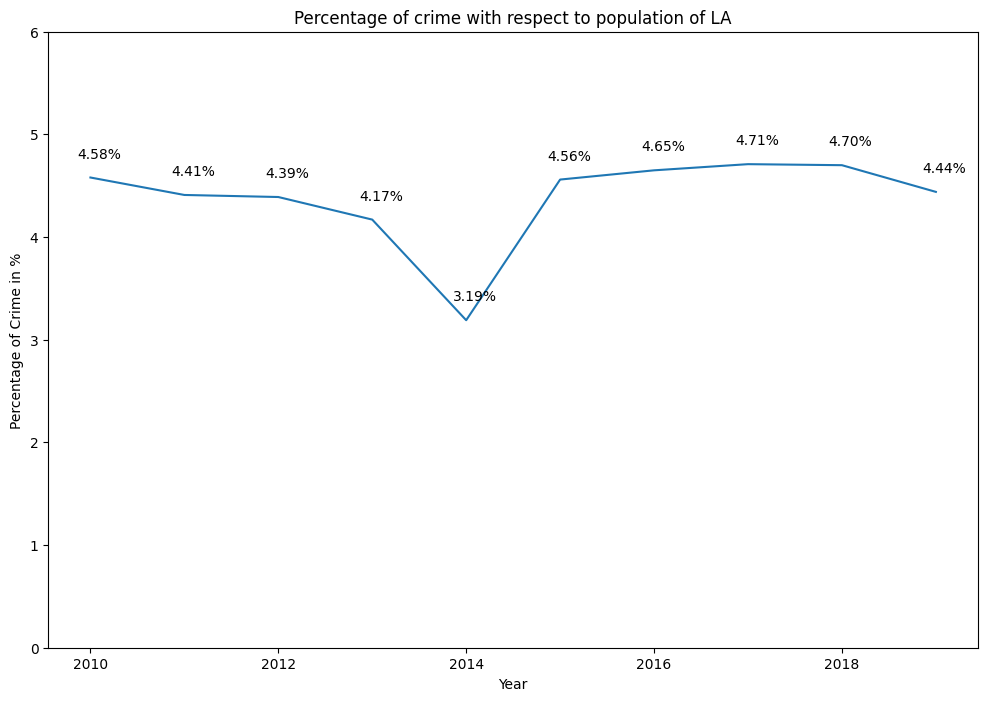

In [53]:
plt.figure(figsize=(12,8))
sns.lineplot(data=crime_pop,x='year_occ',y='crime_percentage')
plt.ylim(0,6)
plt.title("Percentage of crime with respect to population of LA")
plt.xlabel("Year")
plt.ylabel("Percentage of Crime in %")

for x,y in zip(crime_pop['year_occ'],crime_pop['crime_percentage']):
    plt.text(x-0.14,y+0.19,f'{y:.2f}'+"%")
plt.show()

**Crimes each year in relation to its population change each year**

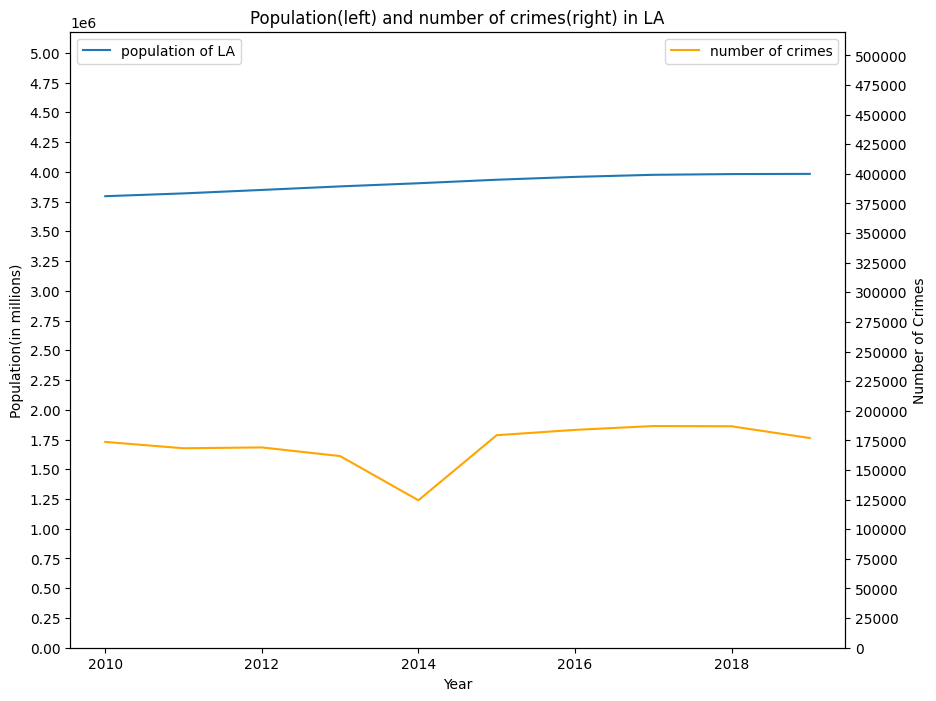

In [54]:
# Plotting the population and number of crimes in a single graph
plt.figure(figsize=(10,8))
ax=sns.lineplot(data=crime_pop,x='year_occ',y='population',label='population of LA')

ax2=ax.twinx()
sns.lineplot(data=crime_pop,x='year_occ',y='count',ax=ax2,color='orange',label='number of crimes')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

ax.set_ylim(0,crime_pop['population'].max()*1.3)
ax2.set_ylim(0,520000)

ax.set_ylabel('Population(in millions)')
ax2.set_ylabel('Number of Crimes')

ax.set_xlabel("Year")
ax2.set_xlabel("Year")

ax.set_yticks(np.linspace(0,5000000,21))
ax2.set_yticks(np.linspace(0,500000,21))
plt.title("Population(left) and number of crimes(right) in LA")
plt.show()

### Insights:
#### - Crime in relation to the population has stayed relatively same during the decade hovering between 4400-4500 per hundred thousand people which is around 4.5 percentage of total population expect for 2014
#### - The population has steadily increased during this period

# Violent and Property Crime

_**Analyzing the types of crime: Violent or Property Crime in LA**_

**First we will need to differentiate violent and property crimes**

In [55]:
crime_list = crime['crm_cd_desc'].unique().tolist()

In [56]:
# Using regex to differentiate each crime type into Violent or Property Crimes, and leaving rest under Others
import re

violent_crime_regex = re.compile(r'(?<!OTHER )ASSAULT|RAPE|ROBBERY|KIDNAPPING|HOMICIDE')
property_crime_regex = re.compile(r'(BURGLARY|ARSON|THEFT|STOLEN|VANDALISM|BURGLARY|PICKPOCKET|SHOPLIFTING|PURSE SNATCHING)')

crime_categories = []

for c in crime_list:
    if violent_crime_regex.search(c):
        crime_categories.append("Violent_Crime")
    elif property_crime_regex.search(c):
        crime_categories.append("Property_Crime")
    else:
        crime_categories.append("Others")

crime_list_w_categories = pd.DataFrame(list(zip(crime_list,crime_categories)),columns=['crime','crm_category'])
crime_list_w_categories[crime_list_w_categories['crm_category']=="Violent_Crime"]#Checking violent crimes

,crime,crm_category
1,"RAPE, ATTEMPTED",Violent_Crime
4,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Violent_Crime
6,BATTERY - SIMPLE ASSAULT,Violent_Crime
7,ROBBERY,Violent_Crime
12,INTIMATE PARTNER - AGGRAVATED ASSAULT,Violent_Crime
13,INTIMATE PARTNER - SIMPLE ASSAULT,Violent_Crime
16,ATTEMPTED ROBBERY,Violent_Crime
19,"RAPE, FORCIBLE",Violent_Crime
23,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,Violent_Crime
26,KIDNAPPING - GRAND ATTEMPT,Violent_Crime


In [57]:
# Joining main crime data with the new crime category
new_crime=crime.merge(crime_list_w_categories,left_on='crm_cd_desc',right_on='crime',how='left').drop('crime',axis=1)
new_crime.head()

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,vict_age_group,year_occ,month_occ,day_occ,tod,crm_category
0,1307355,2010-02-20,2010-02-20,1350,Newton,VIOLATION OF COURT ORDER,48,M,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,UNKNOWN WEAPON/OTHER WEAPON,Adult Arrest,300 E GAGE AV,46-55,2010,February,Saturday,Afternoon,Others
1,90631215,2010-01-05,2010-01-05,150,Hollywood,VIOLATION OF COURT ORDER,47,F,White,STREET,HAND GUN,Invest Cont,CAHUENGA BL,46-55,2010,January,Tuesday,Night,Others
2,100100501,2010-01-03,2010-01-02,2100,Central,"RAPE, ATTEMPTED",47,F,Hispanic/Latin/Mexican,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST,46-55,2010,January,Saturday,Night,Violent_Crime
3,100100506,2010-01-05,2010-01-04,1650,Central,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,Black,DEPARTMENT STORE,UNKNOWN WEAPON/OTHER WEAPON,Adult Arrest,700 W 7TH ST,18-25,2010,January,Monday,Afternoon,Property_Crime
4,100100508,2010-01-08,2010-01-07,2005,Central,BURGLARY FROM VEHICLE,46,M,Hispanic/Latin/Mexican,STREET,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,PICO BL,46-55,2010,January,Thursday,Evening,Property_Crime


**Creating a new dataframe with all information**

In [58]:
# Joining population with crime category and calculating per_hundred_thousand data per category
new_crime_grp = new_crime.groupby(["year_occ","crm_category"]).size().reset_index(name='count')
crm_cat_pop = new_crime_grp.merge(population_LA,left_on="year_occ",right_on="year",how="left")
crm_cat_pop['per_1000']=(crm_cat_pop['count']/crm_cat_pop['population'])*1000
crm_cat_pop['percentage']=(crm_cat_pop['count']/crm_cat_pop['population'])*100
crm_cat_pop

,year_occ,crm_category,count,year,population,per_1000,percentage
0,2010,Others,24964,2010,3795206,6.577772,0.657777
1,2010,Property_Crime,96574,2010,3795206,25.446313,2.544631
2,2010,Violent_Crime,52183,2010,3795206,13.749715,1.374971
3,2011,Others,23812,2011,3818812,6.235447,0.623545
4,2011,Property_Crime,94919,2011,3818812,24.855636,2.485564
5,2011,Violent_Crime,49642,2011,3818812,12.999331,1.299933
6,2012,Others,23422,2012,3847857,6.087025,0.608702
7,2012,Property_Crime,97153,2012,3847857,25.248599,2.524860
8,2012,Violent_Crime,48508,2012,3847857,12.606498,1.260650
9,2013,Others,21429,2013,3877721,5.526184,0.552618


**Number of crimes (per hundred thousand people) for each crime category in LA**

/tmp/ipykernel_18/34677897.py:6: MatplotlibDeprecationWarning:

Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.



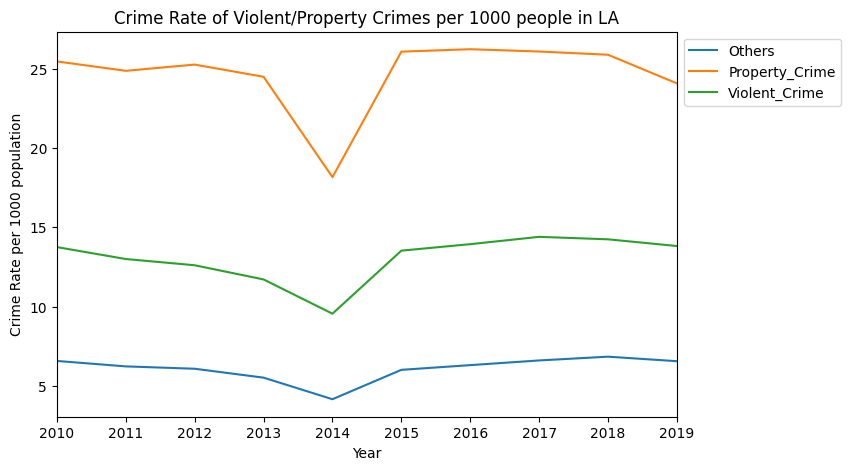

In [59]:
# Plotting the number of crimes per 100,000 people for each crime category
plt.figure(figsize=(8,5))

sns.lineplot(data=crm_cat_pop,x='year_occ',y='per_1000',hue='crm_category')
plt.legend(bbox_to_anchor=(1,1))
plt.xlim(2010,2019,1)
plt.xlabel("Year")
plt.ylabel("Crime Rate per 1000 population")
plt.title("Crime Rate of Violent/Property Crimes per 1000 people in LA")
plt.show()

**Percentage of Crime in LA**

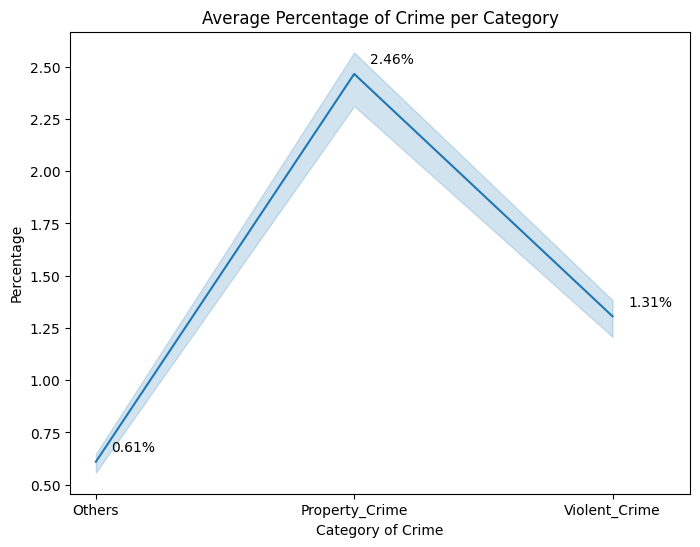

In [60]:
plt.figure(figsize=(8,6))
sns.lineplot(data=crm_cat_pop,x='crm_category',y='percentage')

new_group = crm_cat_pop.groupby('crm_category')['percentage'].mean().reset_index()
plt.xlim(-0.1,2.3)
plt.title("Average Percentage of Crime per Category")
plt.xlabel("Category of Crime")
plt.ylabel("Percentage")

for i,value in enumerate(new_group['percentage']):
    plt.text(i+0.06,value+0.05,f'{value:.2f}'+'%')

plt.show()

### Insights:
#### - On average, almost 25 people per 1000 population face property crime and 13 people per 1000 population face violent crime in LA
#### - There is a high number of property crimes followed by violent crimes in LA
#### - The trend of violent crimes was decreasing till 2014, with a sudden increasing trend from 2015 but is again in a decreasing trend now
#### - Property crime is also in a decreasing trend after 2015 with a sudden decrease in 2019
#### - Property crimes are almost double that of violent crimes

# FINAL INSIGHTS: